# Statistics
##### Facts are stubborn, but statistics are more pliable - Mark Twain

In [2]:
%%capture
# To supress the output when calling LinearAlgebra file
%run ./LinearAlgebra.ipynb
import random as random
import matplotlib.pyplot as plt
import math
from collections import Counter

### Describing a Single Set of data

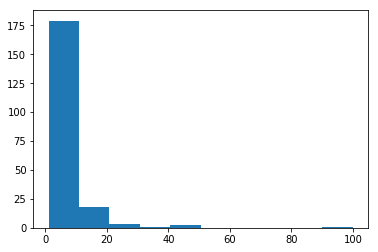

204 100 1


In [4]:
# Exponential distribution with max value 100
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

# Plot histogram
plt.hist(num_friends)
plt.show()

num_points      = len(num_friends)
largest_value   = max(num_friends)
smallest_value  = min(num_friends)
print(num_points, largest_value, smallest_value)

sorted_values   = sorted(num_friends)
smallest_value  = sorted_values[0]
second_largest_value = sorted_values[-2]

### Central tendencies

In [7]:
def mean(x):
    return sum(x)/len(x)

def median(x):
    n            = len(x)
    sorted_x     = sorted(x)
    middle_point = n//2
    if n%2 != 0: #  
        return sorted_x[middle_point]
    else:
        point1       = middle_point-1
        point2       = middle_point
        return(mean([sorted_x[point1], sorted_x[point2]]))

def quantile(x, p):
    """returns pth percentile value in x"""
    p_index = int(len(x)*p)
    return sorted(x)[p_index]

def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

### Dispersion

In [8]:
def data_range(x):
    return max(x) - min(x)

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations)/(n-1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def interquartile_range(x):
    return quantile(x,0.75) - quantile(x,0.25)

def fns(x):
    """five number summary"""
    return min(x), quantile(x,0.25), quantile(x,0.5), quantile(x,0.75), max(x)

### Correlation

In [9]:
def covariance(x,y):
    n = len(x)
    return dot(de_mean(x),de_mean(y))/(n-1)

def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y)/(stdev_x*stdev_y)
    else:
        return 0

### Remove outliers

In [5]:
non_outlier_indices    = [i for i, x_i in enumerate(num_friends) if x_i!=100] # index of non outlier value = 100
num_friends_good       = [x_i for i, x_i in enumerate(num_friends) if i in non_outlier_indices]
print("Number of outliers removed:", len(num_friends)-len(num_friends_good))
daily_minutes_good     = [x_i for i, x_i in enumerate(daily_minutes) if i in non_outlier_indices]

Number of outliers removed: 1
